In [41]:
import pandas as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [42]:
Data = np.read_csv("college_student_placement_dataset.csv")
simple_data = Data[['CGPA','Prev_Sem_Result']]
train_data = simple_data[:-5]
test_data = simple_data[-5:]
simple_data.head()

,CGPA,Prev_Sem_Result
0,6.28,6.61
1,5.37,5.52
2,5.83,5.36
3,5.75,5.47
4,7.69,7.91


In [43]:
formula = "CGPA ~ Prev_Sem_Result"
model = smf.ols(formula=formula, data=train_data)
fitted_model = model.fit()
print(f"Line slope: {fitted_model.params.iloc[1]}")
print(f"Line intercept: {fitted_model.params.iloc[0]}")

Line slope: 0.9960614086828343
Line intercept: 0.02631758446424054


Text(0.5, 1.0, 'Linear Regression Model: Predicting CGPA from Prev_Sem_Result')

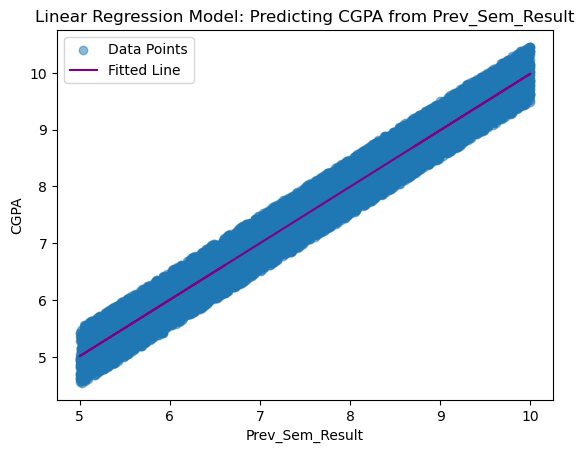

In [54]:
plt.scatter(train_data["Prev_Sem_Result"], train_data["CGPA"], alpha=0.5, label="Data Points")
plt.plot(train_data["Prev_Sem_Result"], fitted_model.params.iloc[1]*train_data["Prev_Sem_Result"]+fitted_model.params.iloc[0], color="purple", label="Fitted Line")
plt.xlabel("Prev_Sem_Result")
plt.ylabel("CGPA")
plt.legend()
plt.title("Linear Regression Model: Predicting CGPA from Prev_Sem_Result")

In [56]:
predicted_CGPA = fitted_model.predict(test_data)
for i in range(len(test_data)):
    actual = test_data.iloc[i]["CGPA"]
    prev_sem = test_data.iloc[i]["Prev_Sem_Result"]
    predicted = predicted_CGPA.iloc[i]
    print(f"prev_sem: {prev_sem:.2f} | Actual CGPA: {actual:.2f} | predicted CGPA: {predicted:.2f}")

prev_sem: 8.41 | Actual CGPA: 8.29 | predicted CGPA: 8.40
prev_sem: 9.25 | Actual CGPA: 9.34 | predicted CGPA: 9.24
prev_sem: 6.08 | Actual CGPA: 6.25 | predicted CGPA: 6.08
prev_sem: 8.77 | Actual CGPA: 8.92 | predicted CGPA: 8.76
prev_sem: 9.41 | Actual CGPA: 9.77 | predicted CGPA: 9.40
